# CHURN PREDICTION ALONGSIDE CUSTOMERS SEGMENTATION 

## Aims
The purpose of this project is to analyze and built models for a telecommunication company in california (Q2 2022) on its churn data. 
The following activities will be carried out:
+ Exploratory Data Analysis and summary statistics to determine the churning rate and the causes
+ Insight and Possible solution : The reason of churning will be explore for possible solution
+ CUSTOMER SEGMENTATION BASED ON INCOME 
+ CHURN PREDICTION 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing the data
data = pd.read_csv(r"telecom_customer_churn.csv")

In [4]:
data.head(5)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [5]:
print("The data consists of 7043 customers details")
data.shape

The data consists of 7043 customers details


(7043, 38)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

# DATA VISUALIZATION AND ANALYSIS

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7043.0,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
Number of Dependents,7043.0,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000,9.000000
Zip Code,7043.0,93486.070567,1856.767505,90001.000000,92101.000000,93518.000000,95329.000000,96150.000000
Latitude,7043.0,36.197455,2.468929,32.555828,33.990646,36.205465,38.161321,41.962127
Longitude,7043.0,-119.756684,2.154425,-124.301372,-121.788090,-119.595293,-117.969795,-114.192901
Number of Referrals,7043.0,1.951867,3.001199,0.000000,0.000000,0.000000,3.000000,11.000000
Tenure in Months,7043.0,32.386767,24.542061,1.000000,9.000000,29.000000,55.000000,72.000000
Avg Monthly Long Distance Charges,6361.0,25.420517,14.200374,1.010000,13.050000,25.690000,37.680000,49.990000
Avg Monthly GB Download,5517.0,26.189958,19.586585,2.000000,13.000000,21.000000,30.000000,85.000000
Monthly Charge,7043.0,63.596131,31.204743,-10.000000,30.400000,70.050000,89.750000,118.750000


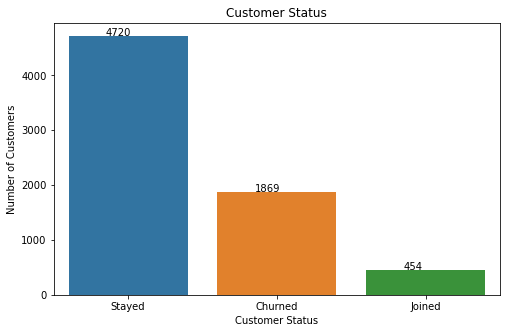

In [8]:
fig,ax = plt.subplots(figsize = (8,5))
sns.countplot('Customer Status', data = data)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
plt.title("Customer Status")
plt.ylabel("Number of Customers")
plt.show()

# INSIGHT
1869 which is 27% of the Company's Customers have left the company for one reason or the other

In [9]:
reason = data[data['Customer Status']== 'Churned']
churn_reason = reason[['Churn Category', 'Churn Reason']]
churn_reason.head(10)

,Churn Category,Churn Reason
2,Competitor,Competitor had better devices
3,Dissatisfaction,Product dissatisfaction
4,Dissatisfaction,Network reliability
18,Dissatisfaction,Limited range of services
19,Competitor,Competitor made better offer
21,Other,Don't know
24,Price,Long distance charges
25,Attitude,Attitude of service provider
40,Competitor,Competitor made better offer
53,Competitor,Competitor had better devices


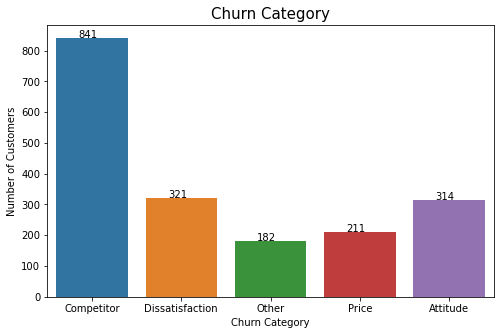

In [10]:
import matplotlib.pyplot as plt
plt, ax = plt.subplots(figsize = (8,5))
sns.countplot('Churn Category', data = churn_reason)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
ax.set_title("Churn Category", fontsize = 15)
ax.set_ylabel("Number of Customers", fontsize = 10)
plt.show()

# INISIGHT
45% of the Company's customer that churned, left the company because of a better offer from its competitors, 17% left due to Dissatisfactory with products and services, 10% for other reasons, 11% because of price while 314 customers, that is, 17% of the churned customers left the company because of its employees' attitude

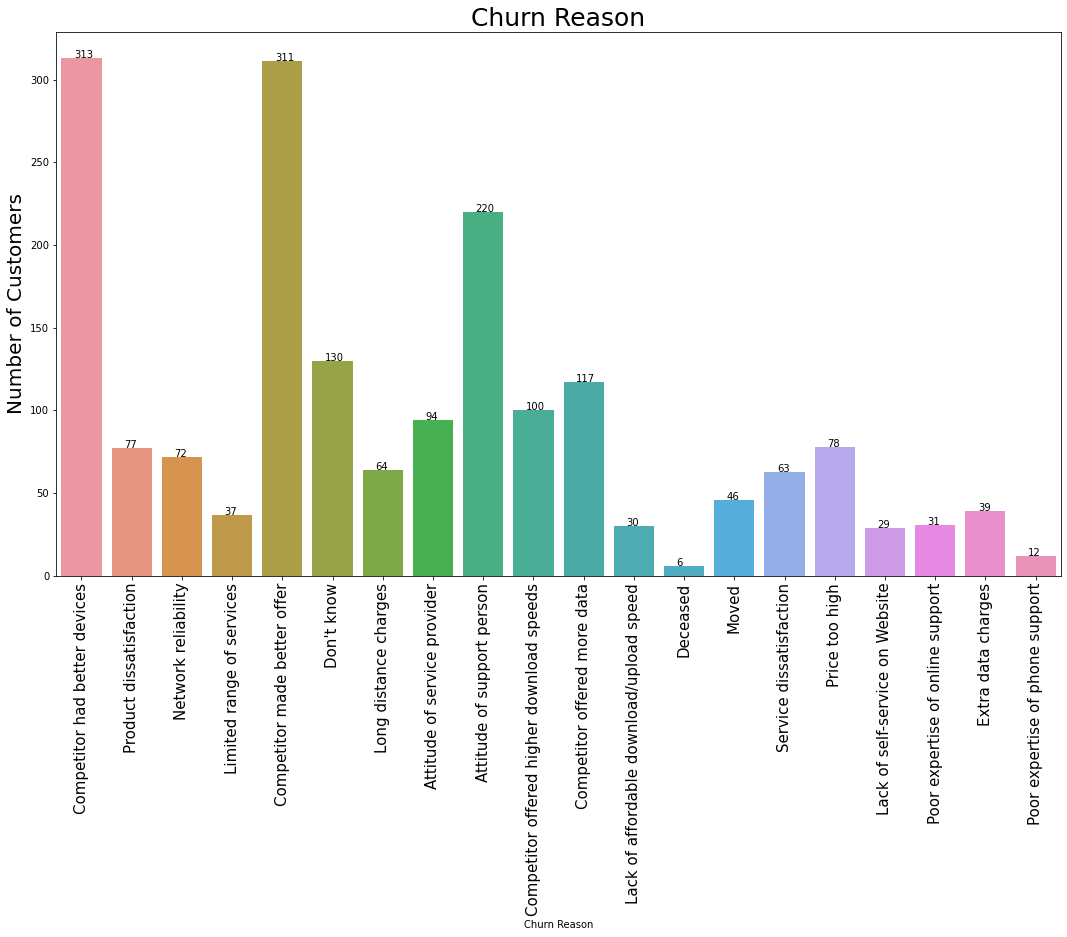

In [11]:
import matplotlib.pyplot as plt
plt, ax = plt.subplots(figsize = (18,10))
sns.countplot('Churn Reason', data = churn_reason)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize = 15)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
ax.set_title("Churn Reason", fontsize = 25)
ax.set_ylabel("Number of Customers", fontsize = 20)
plt.show()

# INSIGHT
The above chart shows the reason customers are leaving and the corresponding number of customers that have churned the company because of it

# POSSIBLE SOLUTION
From the charts above it is obvious that the company is losing most of its customers to competitors because of a better offer.The stakeholders should command the right channel to make enquire about what the competitors have that the company is yet to provide for its customers in order to provide that and curb customers churning for other company.

The issue of Customers' Dissatisfactory are caused by poor expertises in key areas and this can be solved by employing the right person for the right job or holding a compulsory training for workers on how to be efficient on their work

The Stakeholders and the HR department should see to the attitude of the employees towards work and customers in order to make sure that the customers are satisfied with their service and the way they are attended too 

Male      3555
Female    3488
Name: Gender, dtype: int64

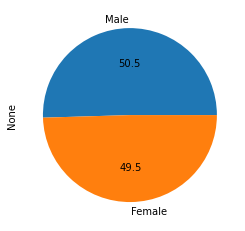

In [12]:
data.value_counts("Gender").plot.pie(autopct ="%.1f")
plt.show()
data.Gender.value_counts()

# INSIGHT
No Gender biasness in the company's Customer they have more females as male

Female    939
Male      930
Name: Gender, dtype: int64

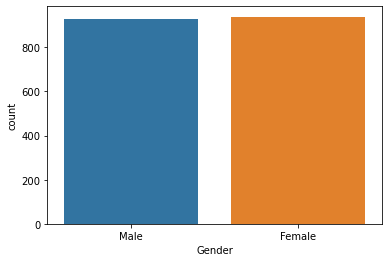

In [13]:
sns.countplot('Gender', data = reason)
plt.show()
reason.Gender.value_counts()

# INSIGHT
The churning rates are equal for both male and female 

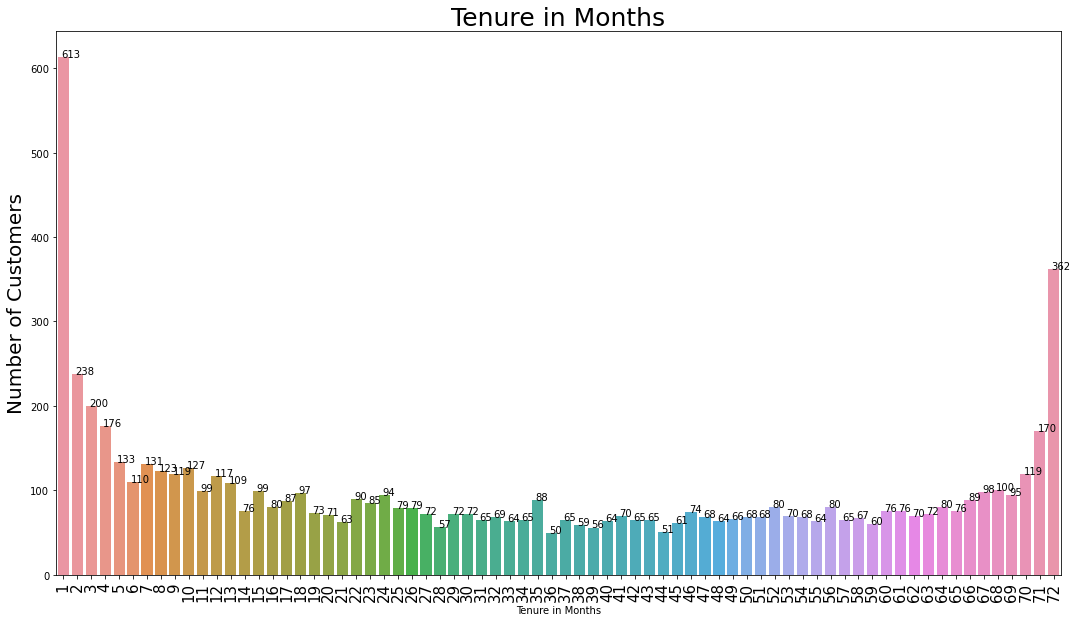

In [14]:
import matplotlib.pyplot as plt
plt, ax = plt.subplots(figsize = (18,10))
sns.countplot('Tenure in Months', data = data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize = 15)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
ax.set_title("Tenure in Months", fontsize = 25)
ax.set_ylabel("Number of Customers", fontsize = 20)
plt.show()

Month-to-Month    3610
Two Year          1883
One Year          1550
Name: Contract, dtype: int64

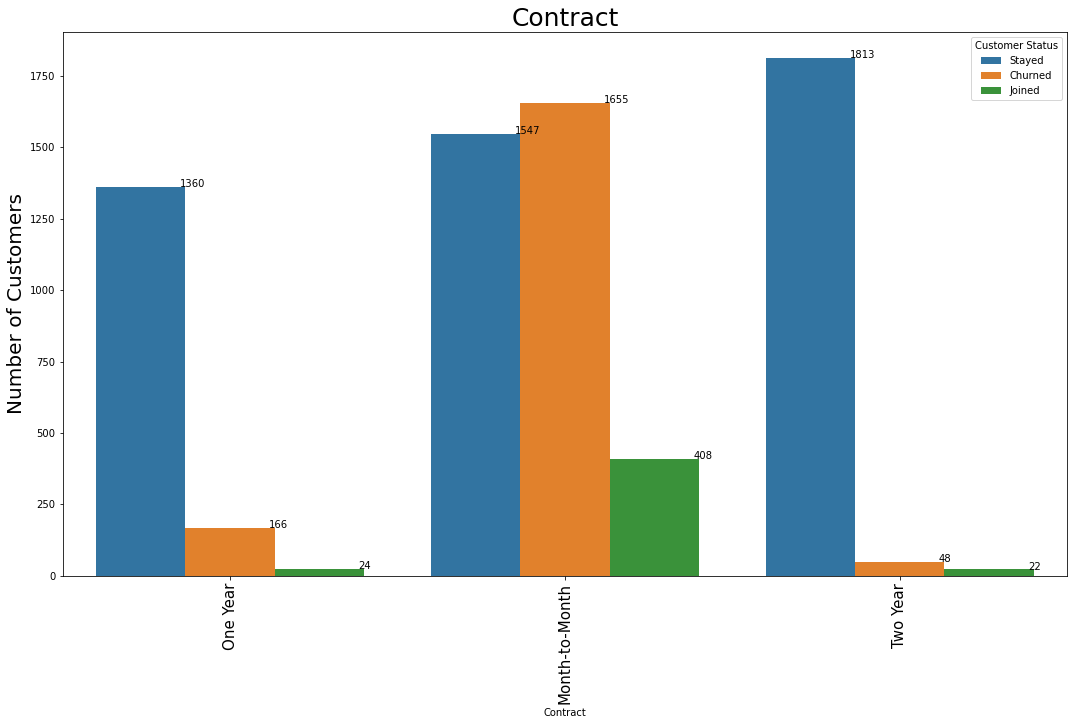

In [15]:
import matplotlib.pyplot as plt
plt, ax = plt.subplots(figsize = (18,10))
sns.countplot('Contract',hue = "Customer Status", data = data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize = 15)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
ax.set_title("Contract", fontsize = 25)
ax.set_ylabel("Number of Customers", fontsize = 20)
plt.show()
data.Contract.value_counts()

# INSIGHT
89% that is, majority of the churned Customers are on Month-to-Month Contract.


# POSSIBLE SOLUTION

The stakeholders should contact the concerns party to make ammendment to the Month-to-Month Contract. Findings reveal that Customers are not Satisfied with this Subscription and Competitors tend to offer them a better offer 

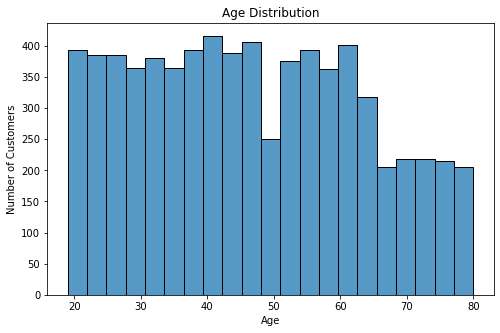

The average age is  47.0  years
The youngest customer is  19 years
The oldest customer is  80 years


In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
sns.histplot(data['Age'])
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel("Number of Customers")
plt.show()
print('The average age is ', np.round(data.Age.mean()),' years')
print('The youngest customer is ', min(data.Age), 'years')
print('The oldest customer is ', max(data.Age), 'years')

# INSIGHT
The Company has more young customers than old age 

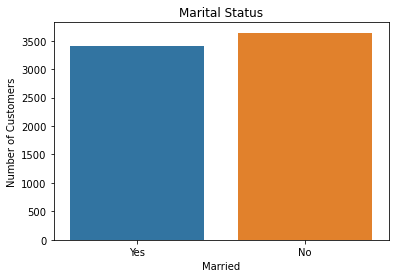

Married customer =  3641
Others =  3402


In [17]:
sns.countplot(data['Married'])
plt.title("Marital Status")
plt.xlabel('Married')
plt.ylabel("Number of Customers")
plt.show()
print('Married customer = ',data.Married.value_counts()[0])
print('Others = ', data.Married.value_counts()[1])

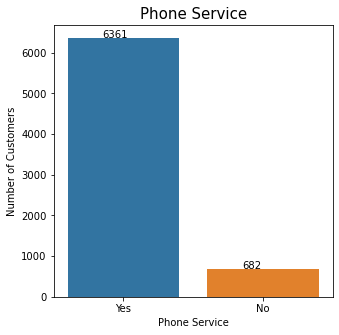

In [18]:
import matplotlib.pyplot as plt
plt, ax = plt.subplots(figsize = (5,5))
sns.countplot('Phone Service', data = data)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 10)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
ax.set_title("Phone Service", fontsize = 15)
ax.set_ylabel("Number of Customers", fontsize = 10)
plt.show()

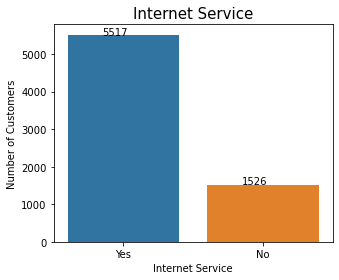

In [19]:
import matplotlib.pyplot as plt
plt, ax = plt.subplots(figsize = (5,4))
sns.countplot('Internet Service', data = data)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 10)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
ax.set_title("Internet Service", fontsize = 15)
ax.set_ylabel("Number of Customers", fontsize = 10)
plt.show()

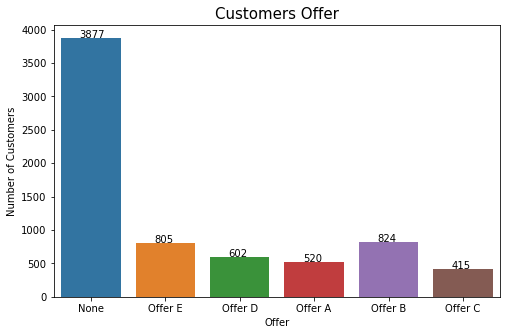

In [20]:
import matplotlib.pyplot as plt
plt, ax = plt.subplots(figsize = (8,5))
sns.countplot('Offer', data = data)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
ax.set_title("Customers Offer", fontsize = 15)
ax.set_ylabel("Number of Customers", fontsize = 10)
plt.show()

# INSIGHT
The chart above shows the type of offer that the company provides for their Customers and the corresponding Number of Customers benefiting from the offer 

In [21]:
reason.Offer.value_counts()

None       1051
Offer E     426
Offer D     161
Offer B     101
Offer C      95
Offer A      35
Name: Offer, dtype: int64

Offer
None       1051
Offer E     426
Offer D     161
Offer B     101
Offer C      95
Offer A      35
dtype: int64

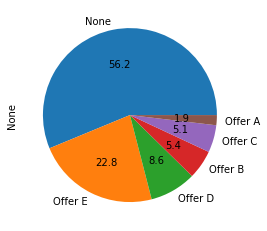

In [22]:
reason.value_counts("Offer").plot.pie(autopct ="%.1f")
plt.show()
reason.value_counts("Offer")

# INSIGHT
The above Chart shows the Offer of the Churning Customers

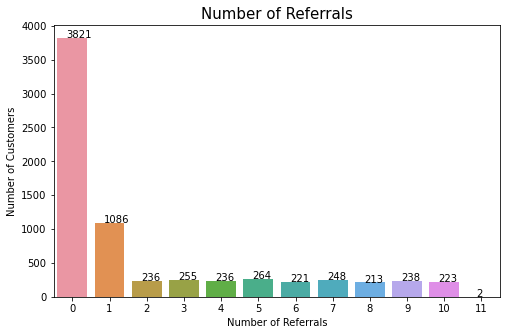

In [23]:
import matplotlib.pyplot as plt
plt, ax = plt.subplots(figsize = (8,5))
sns.countplot('Number of Referrals', data = data)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))
ax.set_title("Number of Referrals", fontsize = 15)
ax.set_ylabel("Number of Customers", fontsize = 10)
plt.show()
#data['Number of Referrals'].value_counts()

# INSIGHT
The Customers' Referral rate is high, and this will be of great advantage to the company if the customers satisfation is company's priority.

<bound method Figure.show of <Figure size 576x360 with 1 Axes>>

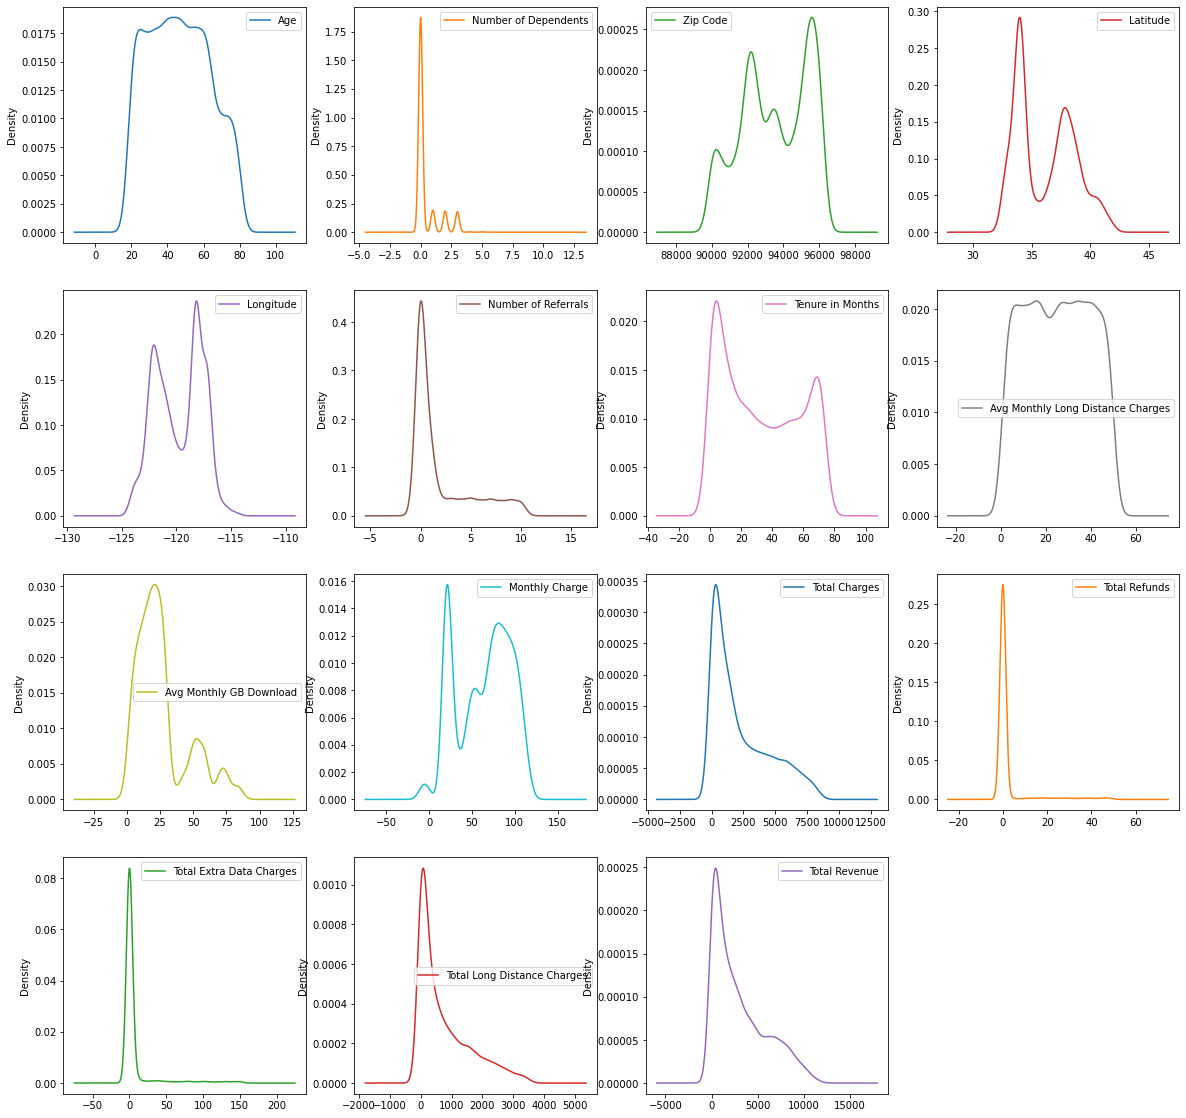

In [24]:
data.plot(kind = 'density', subplots = True , layout = (4,4), sharex = False, sharey=False, figsize = (20,20))
plt.show

Text(0.5, 0, 'Amount')

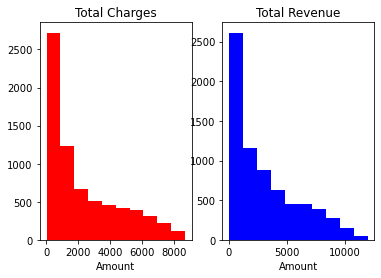

In [25]:
import matplotlib.pyplot as plt
plt.subplot(121)
data['Total Charges'].hist(color = 'red', grid = False)
plt.title('Total Charges')
plt.xlabel('Amount')
plt.subplot(122)
data['Total Revenue'].hist(color = 'blue', grid = False)
plt.title('Total Revenue')
plt.xlabel('Amount')

# INSIGHT
The charges is highly correlated with the Revenue

<AxesSubplot:>

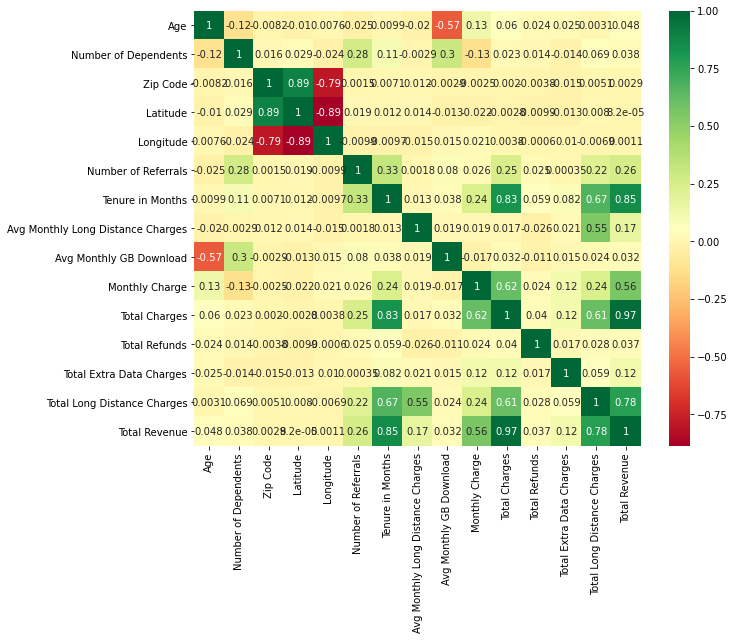

In [26]:
figure = plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True,  cmap = 'RdYlGn')

In [27]:
print("Top 10 Customers' City")
data.City.value_counts().head(10)

Top 10 Customers' City


Los Angeles      293
San Diego        285
San Jose         112
Sacramento       108
San Francisco    104
Fresno            61
Long Beach        60
Oakland           52
Escondido         51
Stockton          44
Name: City, dtype: int64

# Findings and Possible Solutions 
From the charts above it is obvious that the company is losing most of its customers to competitors because of better offer and devices.The stakeholders should command the right channel to make enquiry about what the competitors have that the company is yet to provide,to curb customers churning for other company.

The issue of Customers' Dissatisfactory are caused by unreliable network and service dissatisfactory. The company should find an adequate and permanent solution to their network and improve on their service to customer.

The Stakeholders and the HR department should see to the attitudes of the employees toward work and customers in order to make sure that the customers are satisfied with their service and the way they are attended too.

If all these recommendations are followed the company stands a chance to retain over 80% of its churned customers

## MODEL 
#### DATA CLEANING FOR MODEL PURPOSE

+ Unnecessary columns will be dropped
+ Nan values will be filled
+ Object datatypes will be converted to integers for model purposes

In [28]:
# The following columns will not be needed for model building
Modata = data.drop(['Churn Category','Churn Reason', 'Customer ID', 'Zip Code', 'Latitude', 'Longitude', 'City', 'Number of Referrals'], axis = 1)

In [29]:
Modata.head(4)

,Gender,Age,Married,Number of Dependents,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,9,None,Yes,42.39,No,Yes,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,9,None,Yes,10.69,Yes,Yes,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,4,Offer E,Yes,33.65,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,13,Offer D,Yes,27.82,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned


In [30]:
Modata.isna().sum()

Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                     1526
Streaming Music                      1526
Unlimited Data                       1526
Contract                                0
Paperless Billing                       0
Payment Method                          0
Monthly Charge                    

In [31]:
Modata.dtypes

Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming TV                          object
Streaming Movies                      object
Streaming Music                       object
Unlimited Data                        object
Contract                              object
Paperless Billing                     object
Payment Me

In [32]:
Modata = Modata.fillna(0)

In [33]:
Modata.isna().sum()

Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges                        0
Total Refunds            

+ ALL Nan were filled with zero because anyone that does not pick answer yes/no implies the service is not applicable, which is equivalent to No based on available information. ALL No will be filled with zero and 1 with yes in the long run

### All the columns with Object data type will be converted to integer for model construction purpose

In [34]:
def col(Modata):
    for column in Modata:
        if Modata[column].dtype == 'object':
            print(f" {column} : {Modata[column].unique()}")

In [35]:
col(Modata)

 Gender : ['Female' 'Male']
 Married : ['Yes' 'No']
 Offer : ['None' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
 Phone Service : ['Yes' 'No']
 Multiple Lines : ['No' 'Yes' 0]
 Internet Service : ['Yes' 'No']
 Internet Type : ['Cable' 'Fiber Optic' 'DSL' 0]
 Online Security : ['No' 'Yes' 0]
 Online Backup : ['Yes' 'No' 0]
 Device Protection Plan : ['No' 'Yes' 0]
 Premium Tech Support : ['Yes' 'No' 0]
 Streaming TV : ['Yes' 'No' 0]
 Streaming Movies : ['No' 'Yes' 0]
 Streaming Music : ['No' 'Yes' 0]
 Unlimited Data : ['Yes' 'No' 0]
 Contract : ['One Year' 'Month-to-Month' 'Two Year']
 Paperless Billing : ['Yes' 'No']
 Payment Method : ['Credit Card' 'Bank Withdrawal' 'Mailed Check']
 Customer Status : ['Stayed' 'Churned' 'Joined']


In [36]:
Modata.replace('Joined', 'Stayed', inplace = True)
#Modata.fillna('No', inplace = True)

In [37]:
col(Modata)

 Gender : ['Female' 'Male']
 Married : ['Yes' 'No']
 Offer : ['None' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
 Phone Service : ['Yes' 'No']
 Multiple Lines : ['No' 'Yes' 0]
 Internet Service : ['Yes' 'No']
 Internet Type : ['Cable' 'Fiber Optic' 'DSL' 0]
 Online Security : ['No' 'Yes' 0]
 Online Backup : ['Yes' 'No' 0]
 Device Protection Plan : ['No' 'Yes' 0]
 Premium Tech Support : ['Yes' 'No' 0]
 Streaming TV : ['Yes' 'No' 0]
 Streaming Movies : ['No' 'Yes' 0]
 Streaming Music : ['No' 'Yes' 0]
 Unlimited Data : ['Yes' 'No' 0]
 Contract : ['One Year' 'Month-to-Month' 'Two Year']
 Paperless Billing : ['Yes' 'No']
 Payment Method : ['Credit Card' 'Bank Withdrawal' 'Mailed Check']
 Customer Status : ['Stayed' 'Churned']


In [38]:
yes_no_columns = ['Unlimited Data','Streaming Music', "Phone Service",'Online Security','Online Backup',
                 'Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Paperless Billing','Married','Internet Service',
                 'Multiple Lines']

for col in yes_no_columns:
    Modata[col].replace({'Yes': 1, 'No': 0}, inplace = True)

In [39]:
for col in Modata:
    print(f'{col} : {Modata[col].unique()}')

Gender : ['Female' 'Male']
Age : [37 46 50 78 75 23 67 52 68 43 47 25 58 32 39 72 79 26 30 22 34 42 64 48
 28 33 31 60 69 20 57 19 38 54 35 51 66 61 24 55 59 71 49 40 21 45 29 62
 76 77 73 41 56 80 63 53 44 70 74 36 27 65]
Married : [1 0]
Number of Dependents : [0 3 1 2 4 6 5 9 7 8]
Tenure in Months : [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
Offer : ['None' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
Phone Service : [1 0]
Avg Monthly Long Distance Charges : [42.39 10.69 33.65 ... 10.04 25.59  2.01]
Multiple Lines : [0 1]
Internet Service : [1 0]
Internet Type : ['Cable' 'Fiber Optic' 'DSL' 0]
Avg Monthly GB Download : [16. 10. 30.  4. 11. 73. 14.  7. 21. 59. 19. 12. 20. 22. 17.  9.  0. 52.
 57. 51. 41. 23. 27.  2. 69. 53. 15. 29. 85. 28. 18. 48. 25. 26.  8.  6.
  5. 13. 75. 82. 24. 76. 47. 71. 58. 42.  

In [40]:
df = pd.get_dummies(columns = ['Gender', 'Customer Status','Payment Method','Contract','Internet Type','Offer'], data = Modata, drop_first = True)
df.head()

,Age,Married,Number of Dependents,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,...,Contract_One Year,Contract_Two Year,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E
0,37,1,0,9,1,42.39,0,1,16.0,0,...,1,0,1,0,0,0,0,0,0,0
1,46,0,0,9,1,10.69,1,1,10.0,0,...,0,0,1,0,0,0,0,0,0,0
2,50,0,0,4,1,33.65,0,1,30.0,0,...,0,0,0,0,1,0,0,0,0,1
3,78,1,0,13,1,27.82,0,1,4.0,0,...,0,0,0,0,1,0,0,0,1,0
4,75,1,0,3,1,7.38,0,1,11.0,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
df.columns.unique()

Index(['Age', 'Married', 'Number of Dependents', 'Tenure in Months',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Avg Monthly GB Download', 'Online Security',
       'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
       'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Gender_Male', 'Customer Status_Stayed',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check',
       'Contract_One Year', 'Contract_Two Year', 'Internet Type_Cable',
       'Internet Type_DSL', 'Internet Type_Fiber Optic', 'Offer_Offer A',
       'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E'],
      dtype='object')

## CUSTOMER SEGMENTATION

### K MEANS ALGORITHM

In [41]:
#importing needed libraries in this section
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler

In [42]:
#another dataframe for kmeans algorithms
df2 = df[["Age", 'Total Revenue']]
df2.head()

,Age,Total Revenue
0,37,974.81
1,46,610.28
2,50,415.45
3,78,1599.51
4,75,289.54


##### Note
+ Total Revenue Indicates the company's total revenue from this customer, calculated to the end of the quarter specified above (Total Charges - Total Refurnds + Total Extra Data Charges + Total Long Distance Charges)


In [43]:
#Scaling the data
scaled_df2 = MinMaxScaler().fit_transform(df2.values)
scaled_df2

array([[0.29508197, 0.07973337],
       [0.44262295, 0.04924912],
       [0.50819672, 0.03295624],
       ...,
       [0.04918033, 0.00908431],
       [0.03278689, 0.39708462],
       [0.27868852, 0.30826611]])

#### Using the Elbow method to determine the best K values( number of clusters)

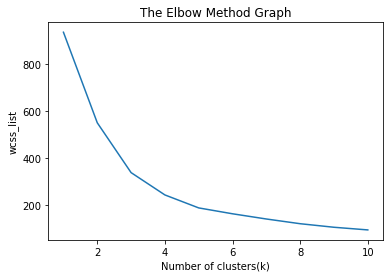

In [44]:
import matplotlib.pyplot as plt
wcss_list = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    kmeans.fit(scaled_df2)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1,11), wcss_list)
plt.title("The Elbow Method Graph")
plt.xlabel("Number of clusters(k)")
plt.ylabel("wcss_list")
plt.show()

In [45]:
#building Kmeans
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(scaled_df2)
labels = k_means.labels_
#adding the label for each customer
df2["Cluster"] = labels
df2.head(5)

,Age,Total Revenue,Cluster
0,37,974.81,0
1,46,610.28,3
2,50,415.45,3
3,78,1599.51,1
4,75,289.54,1


In [46]:
cl1= df2[df2.Cluster==0]
cl2= df2[df2.Cluster==1]
cl3= df2[df2.Cluster==2]
cl4 =df2[df2.Cluster==3]
cl5 =df2[df2.Cluster==4]

In [ ]:
cl1= df2[df2.Cluster==0]
cl2= df2[df2.Cluster==1]
cl3= df2[df2.Cluster==2]
cl4 =df2[df2.Cluster==3]
plt.figure(figsize = (8,5))
plt.scatter(cl1.Age, cl1["Total Revenue"], s= 20, c= 'blue', label = 'cluster1')
plt.scatter(cl2.Age, cl2["Total Revenue"], s= 20, c= 'red', label = 'cluster2')
plt.scatter(cl3.Age, cl3["Total Revenue"], s= 20, c= 'green', label = 'cluster3')
plt.scatter(cl4.Age, cl4["Total Revenue"], s= 20, c= 'black', label = 'cluster4')
plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Total Revenue")
plt.legend()
plt.show()

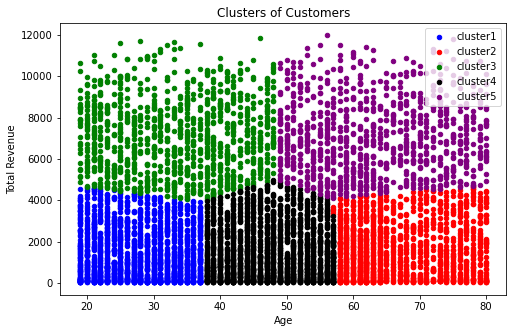

Average Age and Total revenue per cluster
               Age  Total Revenue
Cluster                          
0        27.827330    1414.453248
1        67.164062    1607.037770
2        33.477512    7027.235426
3        47.479438    1465.580057
4        63.194565    7038.808120


In [47]:
plt.figure(figsize = (8,5))
plt.scatter(cl1.Age, cl1["Total Revenue"], s= 20, c= 'blue', label = 'cluster1')
plt.scatter(cl2.Age, cl2["Total Revenue"], s= 20, c= 'red', label = 'cluster2')
plt.scatter(cl3.Age, cl3["Total Revenue"], s= 20, c= 'green', label = 'cluster3')
plt.scatter(cl4.Age, cl4["Total Revenue"], s= 20, c= 'black', label = 'cluster4')
plt.scatter(cl5.Age, cl5["Total Revenue"], s= 20, c= 'purple', label = 'cluster5')
plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Total Revenue")
plt.legend()
plt.show()
print('Average Age and Total revenue per cluster')
print(df2.groupby('Cluster').mean())

#### INSIGHT

From the above chart and table 
+ The customers in the first cluster are old and spend less
+ The customers in second cluster are young and spend less
+ The customers in the third cluster are old and spend much
+ The customers in the fourth cluster are young and spend much
+ The customers in the fifth cluster are in their middle age and spend less

## Recommendations

+ Attention should be paid to customers in third and fourth clusters as they spend much. Losing customers from those sides will hinder the profit of the company.
+ Special and enticing offers should be made for other clusters for them to see more reasons to spend on the company's service

## CHURN PREDICTION 

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
df['Customer Status_Stayed'].value_counts()

1    5174
0    1869
Name: Customer Status_Stayed, dtype: int64

+ The data was splitted into two, the first 5000 rows will be use to train the model while the remaining 2000+ rows will be use as a test data on the model to see how accurate the model is with a new data.

In [44]:
train = df[:5000]
test = df[5000:]

In [45]:
train.head(2)

,Age,Married,Number of Dependents,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,...,Contract_One Year,Contract_Two Year,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E
0,37,1,0,9,1,42.39,0,1,16.0,0,...,1,0,1,0,0,0,0,0,0,0
1,46,0,0,9,1,10.69,1,1,10.0,0,...,0,0,1,0,0,0,0,0,0,0


In [46]:
test.head(2)

,Age,Married,Number of Dependents,Tenure in Months,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Avg Monthly GB Download,Online Security,...,Contract_One Year,Contract_Two Year,Internet Type_Cable,Internet Type_DSL,Internet Type_Fiber Optic,Offer_Offer A,Offer_Offer B,Offer_Offer C,Offer_Offer D,Offer_Offer E
5000,62,0,0,30,1,24.57,0,0,0.0,0,...,1,0,0,0,0,0,0,0,0,0
5001,71,0,0,35,1,20.83,1,1,19.0,0,...,0,0,0,0,1,0,0,0,0,0


In [47]:
print(train['Customer Status_Stayed'].value_counts())
test['Customer Status_Stayed'].value_counts()

1    3647
0    1353
Name: Customer Status_Stayed, dtype: int64


1    1527
0     516
Name: Customer Status_Stayed, dtype: int64

In [48]:
X = train.drop('Customer Status_Stayed', axis = 1)
y = train['Customer Status_Stayed']

#test
testdata = test.drop('Customer Status_Stayed', axis = 1)
testoutput = test['Customer Status_Stayed']

In [49]:
from imblearn.over_sampling import SMOTE
over = SMOTE()
X,y = over.fit_resample(X,y)
testdata, testoutput = over.fit_resample(testdata, testoutput)

In [50]:
y.value_counts(), testoutput.value_counts() #the imbalance has been taking care

(0    3647
 1    3647
 Name: Customer Status_Stayed, dtype: int64,
 0    1527
 1    1527
 Name: Customer Status_Stayed, dtype: int64)

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 5)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5835, 37), (1459, 37), (5835,), (1459,))

## MODEL

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

##### Model Selection with C V

In [56]:
log = (cross_val_score(LogisticRegression(max_iter =1000),X,y,cv =5)).mean()
svc = cross_val_score(SVC(),X,y,cv =5).mean()
dtc = cross_val_score(DecisionTreeClassifier(),X,y,cv =5).mean()
rfc = cross_val_score(RandomForestClassifier(n_estimators = 10),X,y,cv =5).mean()
knn = cross_val_score(KNeighborsClassifier(),X,y,cv =5).mean()
nbc= cross_val_score(GaussianNB(),X,y,cv =5).mean()
score = log,svc,dtc,rfc,knn,nbc
model = { 'Score': score, 'name':['LogisticRegression','SVC','DecisionTree','RandomFores','KNN', 'NaiveBayes']}
pd.DataFrame(model).set_index('name')

,Score
name,
LogisticRegression,0.826579
SVC,0.660132
DecisionTree,0.815611
RandomFores,0.847827
KNN,0.761858
NaiveBayes,0.806695


+ Random Forest Performed better than others on the entire data

## RANDOM FOREST CLASSIFIER

In [71]:
RFC = RandomForestClassifier()
RFC = RFC.fit(X_train,y_train)
y_pred_rfc = RFC.predict(X_test)
print(round(accuracy_score(y_test,y_pred_rfc)*100, 2), '%')

87.59 %


In [58]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       743
           1       0.88      0.87      0.87       716

    accuracy                           0.88      1459
   macro avg       0.88      0.88      0.88      1459
weighted avg       0.88      0.88      0.88      1459



#### Using the test data on Random forest Classifier
+ Out of Sample data

In [60]:
y_test_pred_rfc = RFC.predict(testdata)
accuracy_score(testoutput,y_test_pred_rfc)

0.8637851997380485

In [62]:
print(classification_report(testoutput, y_test_pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1527
           1       0.85      0.88      0.87      1527

    accuracy                           0.86      3054
   macro avg       0.86      0.86      0.86      3054
weighted avg       0.86      0.86      0.86      3054



<AxesSubplot:>

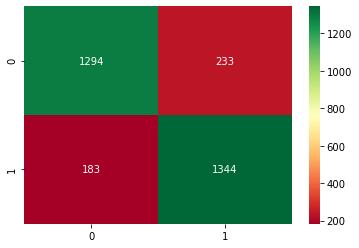

In [65]:
sns.heatmap(confusion_matrix(testoutput,y_test_pred_rfc), annot =True, fmt='d', cmap = 'RdYlGn')

# SUMMARY

+ EDA 

Data visualization and analysis were performed, and Conclusions and potential solutions were suggested.

+ Customer Segmentation

This was done to group customers based on thier spending power and age.

+ Churn Prediction

Random Forest Classifier was built to predict if a customer will churn or not based on his/her features 